# Perceptron for regression

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123) 

## Example chart for linear regression

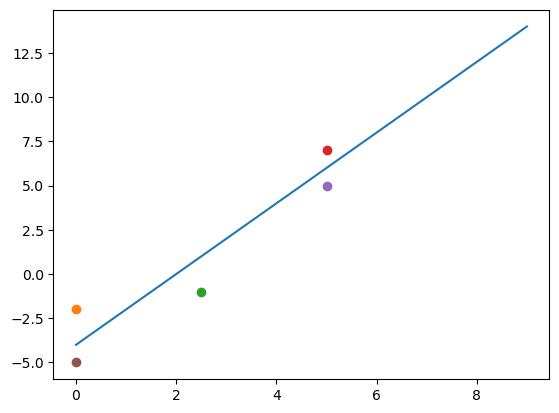

In [143]:
#In simple words the goal of linear regression is to find linear function that best fits data points.

x = np.array(range(0, 10))
y = x*2-4
plt.plot(x, y)
plt.plot(0, -2, 'o')
plt.plot(2.5, -1, 'o')
plt.plot(5, 7, 'o')
plt.plot(5, 5, 'o')
plt.plot(0, -5, 'o')

plt.show()

## Linear Regression
Linear regression helps to find parameters a and b for standard linear function y= ax + b. This can be described can be described as:

$$\hat{y} = wx + b,\tag{1}$$ 

It can be written also in matrix form:

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{3}\end{align}


Steps for building a neural network:
1. Define the artificial neural network structure: number of hidden layers and units inside these layers  
2. Initialize the model's parameters
3. Loop:
3.1 Forward propagation - pass input through all connected units and calculate the perceptron output
3.2 Backward propagation - calculate how much current result differs from expectations and update params in network to give a bit better results on each run 
3.3 Update network parameters.
4. Make predictions.

## Predict apartment price in city of Poznan based on area 

In [144]:
# First need to load the data
data = pd.read_csv("houses.csv", encoding='ISO-8859-1')
data.head(10)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
5,5,Nowa Huta Czy¿yny ul. Woniców,Kraków,2.0,26071.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0
6,6,Podgórze P³aszów Koszykarska,Kraków,0.0,22569.0,50.049893,19.990603,750000.0,4.0,81.40,2021.0
7,7,Mokotów Pory,Warszawa,10.0,13308.0,52.184058,21.044302,2890000.0,6.0,280.00,2003.0
8,8,Ursynów Wy¿yny,Warszawa,3.0,11387.0,52.140282,21.056345,615000.0,4.0,63.40,1982.0
9,9,Bemowo,Warszawa,1.0,10904.0,52.238974,20.913288,429000.0,1.0,40.00,1999.0


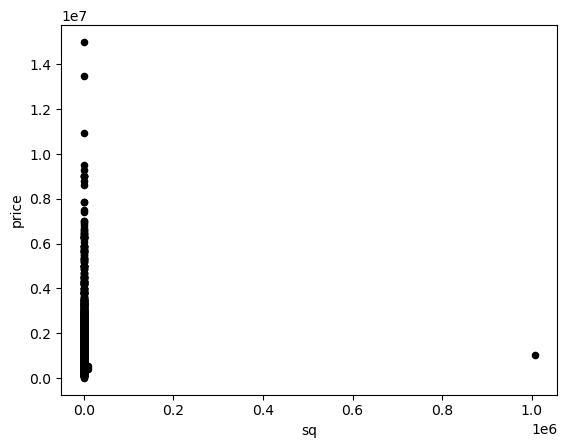

In [145]:
#inline plot in notebook
%matplotlib inline 
#display plot with price depending on square footage before normalization
data.plot(x='sq', y='price', kind='scatter', c='black')

# normalize the data
# remove outliers
data = data.where(data['city'] == 'Poznañ')
data['sq'] = data['sq'].where(data['sq'] < 150)
data['price'] = data['price'].where(data['price'] < 1200000)

# remove empty values
data.dropna(subset = ['sq', 'price'], inplace=True)

# keep original data for later use
originalData = data.copy()

<Axes: xlabel='sq', ylabel='price'>

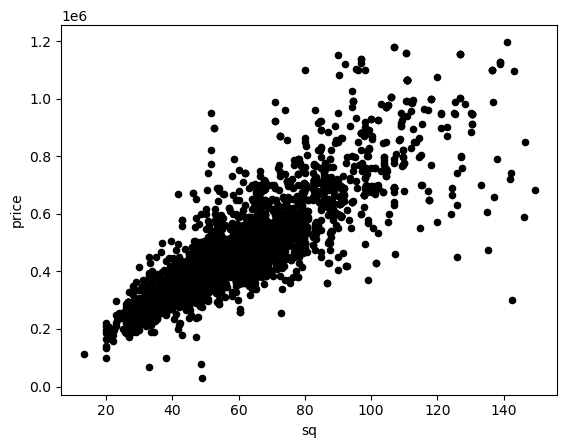

In [146]:
#display plot with price depending on square footage after normalization
data.plot(x='sq', y='price', kind='scatter', c='black')

In [147]:
#save the fields into variables X and Y and reshape them to row vectors:
X = data['sq']
Y = data['price']

X = np.array(X).reshape((1, len(X)))
Y = np.array(Y).reshape((1, len(Y)))

print ('shape of X: ' + str(X.shape))
print ('shape of Y: ' + str(Y.shape))

shape of X: (1, 4091)
shape of Y: (1, 4091)


## Create artificial neural network

### Define number of input and output units

In [148]:
n_x = X.shape[0]
n_y = Y.shape[0]
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


### Initialize network parameters

Init network parameters with very small random number for weights and zero for biases. 

In [149]:
def init_params(n_x, n_y):
    """
    :param n_x: 
    :param n_y: 
    :return: 
    W - weights
    b - biases
    """
    W = np.random.uniform(1, 2, (n_y, n_x))
    b = np.zeros((n_y, 1))
    
    return (W, b)

(W, b) = init_params(n_x, n_y)
print("W = " + str(W))
print("b = " + str(b))

W = [[1.69646919]]
b = [[0.]]


### Forward propagation

In [150]:
def forward_propagation(X, W, b):
    """
    W - weights
    b - biases
    :return:
    Y_hat 
    """
    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    Y_hat = Z

    return Y_hat

Y_hat = forward_propagation(X, W, b)

print("Some elements of output vector Y_hat:", Y_hat[0, 0:5])

Some elements of output vector Y_hat: [102.2801272  131.28975027 112.84913023 131.95137326  98.81933006]


### Compute cost

Cost can be computed from formula below:
$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [151]:
def cost(Y_hat, Y):
    """
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    """
    # Number of examples.
    m = Y_hat.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2/(2*m))
    
    return cost

print("Cost = " + str(cost(Y_hat, Y)))

Cost = 117166388064.91335


## Calculate partial derivatives 

 Partial derivatives show the direction in which weights should be updated. 

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\end{align}

In [152]:
def backward_propagation(Y_hat, X, Y):
    """
    Implements the backward propagation, calculating gradients
    """
    m = X.shape[1]
    
    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity. 
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    return (dW, db)

(dW, db) = backward_propagation(Y_hat, X, Y)

print("dW = " + str(dW))
print("db = " + str(db))

dW = [[-29325834.03542777]]
db = [[-455995.00819631]]


## Update parameters

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.
\end{align}


In [153]:
def update_params(W, b, dW, db, alpha=0.001):
    # Update rule for each parameter.
    W = W - alpha * dW
    b = b - alpha * db
    
    return (W, b)

(W, b) = update_params(W, b, dW, db) 

print("new W = " + str(W))
print("new b = " + str(b))

new W = [[29327.53050461]]
new b = [[455.9950082]]



### Put everything together

In [154]:
def nn_model(X, Y, iterations=100, alpha=0.001):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    print("Shape[0] of X: ")
    print(n_x)
    print("Shape[0] of Y: ")
    print(n_y)

    W, b = init_params(n_x, n_y)
    
    for i in range(0, iterations):
         
        # Forward propagation. Inputs: "X, parameters"
        Y_hat = forward_propagation(X, W, b)
        
        # Cost function. Inputs: "Y_hat, Y"
        cost_value = cost(Y_hat, Y)
        
        # Backpropagation. Inputs: "Y_hat, X, Y"
        dW, db = backward_propagation(Y_hat, X, Y)
        print ("dW and db")
        print(dW, db)
        # Gradient descent parameter update.
        W, b = update_params(W, b, dW, db, alpha)
        print ("W and b")
        print (W, b)
        print ("Cost after %i: %f" %(i, cost_value))

    return W, b

In [155]:
# this is simple case and function converges after small amount of iterations
newW, newB = nn_model(X, Y, 1000, 0.0001)
print("W = " + str(newW))
print("b = " + str(newB))

Shape[0] of X: 
1
Shape[0] of Y: 
1
dW and db
[[-29327390.15358399]] [[-456018.81987024]]
W and b
[[2934.02515469]] [[45.60188199]]
Cost after 0: 117178421649.274078
dW and db
[[-18202744.26406807]] [[-285784.70977508]]
W and b
[[4754.2995811]] [[74.18035296]]
Cost after 1: 47464768024.827240
dW and db
[[-11297951.49559934]] [[-180124.57406481]]
W and b
[[5884.09473066]] [[92.19281037]]
Cost after 2: 20608429511.088879
dW and db
[[-7012317.26984445]] [[-114543.90837329]]
W and b
[[6585.32645764]] [[103.64720121]]
Cost after 3: 10262349240.175831
dW and db
[[-4352330.02162428]] [[-73839.57919808]]
W and b
[[7020.55945981]] [[111.03115913]]
Cost after 4: 6276644707.745998
dW and db
[[-2701341.67609349]] [[-48575.37730469]]
W and b
[[7290.69362742]] [[115.88869686]]
Cost after 5: 4741197399.669282
dW and db
[[-1676614.01304636]] [[-32894.4808279]]
W and b
[[7458.35502872]] [[119.17814494]]
Cost after 6: 4149681820.256189
dW and db
[[-1040590.87819991]] [[-23161.70518158]]
W and b
[[7562.4



*Note*: check if function converges with higher value of alpha, for example 0.001 - in this case cost will get higher each iteration and function never converges
check also for different number of iterations


In [156]:
def predict(W, b, X_pred):
    
    Y_pred = X_pred * W + b   
    
    return Y_pred

X_pred = np.array([43, 37, 50, 200])
Y_pred = predict(newW, newB, X_pred)
print(f":\n{X_pred}")
print(f":\n{Y_pred}")

:
[ 43  37  50 200]
:
[[ 332874.35883629  286543.7011956   386926.79275043 1545193.23376763]]


Let's plot the linear regression line and some predictions.

[ 13.3  13.4  13.5 ... 164.1 164.2 164.3] [[ 103537.60351488  104309.78114223  105081.95876957 ... 1267981.46555084
  1268753.64317819 1269525.82080553]]


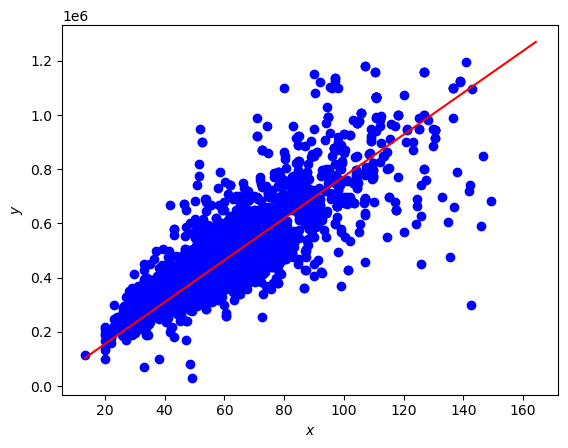

In [157]:
fig, ax = plt.subplots()
plt.scatter(data["sq"], data["price"], color="blue")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(data["sq"]),np.max(data["sq"])*1.1, 0.1)

Y_line = predict(newW, newB, X_line)
print(X_line, Y_line)
ax.plot(X_line, Y_line[0], "r")
plt.plot()
plt.show()

## Multi linear regression

In [158]:
X = data[['sq', 'year']]
Y = data['price']

X = np.array(X).reshape((2, len(X)))
Y = np.array(Y).reshape((1, len(Y)))

print ('shape of X: ' + str(X.shape))
print ('shape of Y: ' + str(Y.shape))

shape of X: (2, 4091)
shape of Y: (1, 4091)


In [161]:
newW, newB = nn_model(X, Y, 1000, 0.0001)
print("W = " + str(newW))
print("b = " + str(newB))

Shape[0] of X: 
2
Shape[0] of Y: 
1
dW and db
[[-4.64346209e+08 -4.68346367e+08]] [[-452314.70744102]]
W and b
[[46436.60162139 46836.32150145]] [[45.23147074]]
Cost after 0: 115500111935.358673
dW and db
[[9.83274213e+10 9.91766359e+10]] [[95698875.6901301]]
W and b
[[-9786305.53060705 -9870827.26776701]] [[-9524.65609827]]
Cost after 1: 4583718486812621.000000
dW and db
[[-2.08213038e+13 -2.10015367e+13]] [[-2.0264976e+10]]
W and b
[[2.07234407e+09 2.09028285e+09]] [[2016972.94250318]]
Cost after 2: 205537809336612290560.000000
dW and db
[[4.40901583e+15 4.44725791e+15]] [[4.29124777e+12]]
W and b
[[-4.38829238e+11 -4.42635508e+11]] [[-4.27107804e+08]]
Cost after 3: 9216515713783463589969920.000000
dW and db
[[-9.33632177e+17 -9.41744625e+17]] [[-9.08701193e+14]]
W and b
[[9.29243884e+13 9.37318270e+13]] [[9.04430115e+10]]
Cost after 4: 413277548337718784348892692480.000000
dW and db
[[1.97701668e+20 1.99422254e+20]] [[1.9242372e+17]]
W and b
[[-1.96772424e+16 -1.98484936e+16]] [[-1.

/tmp/ipykernel_10302/3233446913.py:10: RuntimeWarning: overflow encountered in square
  cost = np.sum((Y_hat - Y)**2/(2*m))
/tmp/ipykernel_10302/3489929421.py:3: RuntimeWarning: invalid value encountered in subtract
  W = W - alpha * dW
